# Submission : Klasifikasi Gambar
Submission berupa program jaringan saraf tiruan menggunakan TensorFlow. Program akan mampu mengenali gambar yang ada di alam sekitar yaitu alam (gunung, laut, jalanan), kendaraan (pesawat, mobil, motor), hewan (kucing, dan anjing), bunga dan orang.

Nama : Reski Mulud Muchamad <br>
ID Dicoding : [reski-mulud](https://dicoding.com/users/reski-mulud) <br>
e-mail : [reski.mulud@gmail.com](mailto:reski.mulud@gmail.com) <br>

# Mengimport library yang diperlukan

In [1]:
import zipfile 
import os
import pandas as pd
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import numpy as np

from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from keras.preprocessing import image
from google.colab import drive

# Mempersiapkan Datasets


1.   Mengunduh data yang bersumber dari drive
2.   Mengekstract data menggunakan metode unzip (library: zipfile)
3. Mengubah datasets menjadi dataframe



## Mendownload Datasets

In [2]:
# mount drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# proses mengekstrak data
local_zip = '/content/drive/MyDrive/dataset/nature_image.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/nature_image')
zip_ref.close()

base_dir = 'nature_image'

In [4]:
os.listdir(base_dir)

['fruit',
 'dog',
 'person',
 'street',
 'airplane',
 'sea',
 'flower',
 'car',
 'cat',
 'mountain',
 'motorbike']

In [5]:
# mengubah dataset kedalam dataframe

# looping data
file_name = []
path_name =  []
tag = []
for path, subdirs, files in os.walk(base_dir) :
  for name in files :
    path_name.append(os.path.join(path, name))
    tag.append(path.split('/')[-1])
    file_name.append(name)

# memasukan data yang telah dikumpulkan pada looping kedalam dataframe
df = pd.DataFrame({"path":path_name,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
airplane      727
car           968
cat           885
dog           702
flower        843
fruit        1000
motorbike     788
mountain     2499
person        986
sea          2274
street       2382
dtype: int64

In [6]:
# cek sample dataframe
df.head()

,path,file_name,tag
0,nature_image/fruit/fruit_0746.jpg,fruit_0746.jpg,fruit
1,nature_image/fruit/fruit_0079.jpg,fruit_0079.jpg,fruit
2,nature_image/fruit/fruit_0760.jpg,fruit_0760.jpg,fruit
3,nature_image/fruit/fruit_0449.jpg,fruit_0449.jpg,fruit
4,nature_image/fruit/fruit_0469.jpg,fruit_0469.jpg,fruit


## Membagi data menjadi train dan validation
**Split data** : Data dibagi menjadi 2 bagian, 80% untuk data training, dan 20% untuk validation

In [7]:
# split data
x = df['path']
y = df['tag']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
# menyatukan masing2 data kedalam dataframe
df_train = pd.DataFrame({'path': x_train, 'tag': y_train, 'set': 'train'})
df_test = pd.DataFrame({'path': x_test, 'tag': y_test, 'set': 'test'})

In [9]:
df_train

,path,tag,set
2992,nature_image/street/12493.jpg,street,train
10198,nature_image/cat/cat_0500.jpg,cat,train
8369,nature_image/flower/flower_0750.jpg,flower,train
3131,nature_image/street/17679.jpg,street,train
2316,nature_image/person/person_0870.jpg,person,train
...,...,...,...
5191,nature_image/airplane/airplane_0564.jpg,airplane,train
13418,nature_image/motorbike/motorbike_0777.jpg,motorbike,train
5390,nature_image/airplane/airplane_0259.jpg,airplane,train
860,nature_image/fruit/fruit_0394.jpg,fruit,train


In [10]:
df_test

,path,tag,set
6193,nature_image/sea/986.jpg,sea,test
1270,nature_image/dog/dog_0024.jpg,dog,test
4401,nature_image/street/11096.jpg,street,test
286,nature_image/fruit/fruit_0127.jpg,fruit,test
2858,nature_image/street/3357.jpg,street,test
...,...,...,...
12443,nature_image/mountain/15965.jpg,mountain,test
715,nature_image/fruit/fruit_0196.jpg,fruit,test
11626,nature_image/mountain/19312.jpg,mountain,test
10788,nature_image/mountain/11858.jpg,mountain,test


In [11]:
# melihat proporsi pada masing masing set apakah sudah ok atau masih ada yang ingin diubah
df_all = df_train.append(df_test).reset_index(drop=1)\

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

#cek jumlah sample datanya
print('Jumlah sample : ', len(df_all))


set    tag      
test   airplane      145
       car           212
       cat           182
       dog           148
       flower        175
       fruit         209
       motorbike     166
       mountain      459
       person        192
       sea           442
       street        481
train  airplane      582
       car           756
       cat           703
       dog           554
       flower        668
       fruit         791
       motorbike     622
       mountain     2040
       person        794
       sea          1832
       street       1901
dtype: int64 


Jumlah sample :  14054


## Merapihkan folder
Setelah membagi data menjadi train dan val kedalam dataframe, file akan dipisahkan dan dimasukan kedalam folder train dan val sesuai data yang ada di dataframe(df_train, df_val). Penamaan folder juga berguna untuk pelebelan data

In [12]:
datasets_path = os.path.join(base_dir, 'dataset')
datasets_path

'nature_image/dataset'

In [13]:
for index, row, in tqdm(df_all.iterrows()) :
  # menemukan filepath
  file_path = row['path']
  if os.path.exists(file_path) == False :
    file_path = os.path.join(source_path,row['path'],row['image'].split('.')[0])
    
  # membuat direktori folder destinasi
  if os.path.exists(os.path.join(datasets_path,row['set'],row['tag'])) == False:
    os.makedirs(os.path.join(datasets_path,row['set'],row['tag']))

  # mendefinisikan direktori file
  destination_file_name = file_path.split('/')[-1]
  file_dest = os.path.join(datasets_path,row['set'],row['tag'],destination_file_name)

  # memindahkan file
  if os.path.exists(file_dest) == False :
    shutil.copy2(file_path, file_dest)


In [14]:
train_dir = os.path.join(datasets_path, 'train')
test_dir = os.path.join(datasets_path, 'test')

**Datasets sudah siap digunakan**

# Preprocessing Data
Langkah selanjutnya adalah kita membuat sebuah objek ImageDataGenerator 
untuk data training dan data testing. Image data generator adalah sebuah 
fungsi yang sangat berguna untuk mempersiapkan data latih dan data testing 
yang akan diberikan ke model. Beberapa kemudahan yang disediakan Image 
data generator adalah, preprocessing data, pelabelan sampel otomatis, 
dan augmentasi gambar.

## Augmentasi Gambar
Kode di bawah menunjukkan proses augmentasi gambar pada setiap sampel di dataset. 
Augmentasi gambar adalah teknik untuk menciptakan data-data baru dari data yang telah ada. 
Contoh augmentasi gambar adalah horizontal flip di mana gambar akan dibalikkan secara horizontal

In [15]:
train_datagen = ImageDataGenerator(
                  rescale=1./255.0,
                  rotation_range=10,                             
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1,
                  horizontal_flip=True,
                  fill_mode='nearest')

val_datagen = ImageDataGenerator(
    rescale=1./255.0
)

In [16]:
# # membuat train  generator
# train_generator = train_datagen.flow_from_directory(
#                     train_dir, #direktori data latih
#                     target_size=(150, 150), # mengubah resolusi gambar menjadi 150 x 150 px
#                     batch_size=256,
#                     shuffle=True,
#                     color_mode='rgb',
#                     class_mode='categorical')

# # membuat tetst generator
# test_generator = val_datagen.flow_from_directory(
#                     test_dir, #direktori data testing
#                     target_size=(150, 150), # mengubah resolusi gambar menjadi 150 x 150 px
#                     batch_size=256,
#                     shuffle=True,
#                     color_mode='rgb'   
#                     class_mode='categorical')

# membuat train  generator
train_generator = train_datagen.flow_from_dataframe(
                    df_train,
                    target_size=(150, 150), # mengubah resolusi gambar menjadi 150 x 150 px
                    x_col='path',
                    y_col='tag',
                    batch_size=256,
                    shuffle=True,
                    color_mode='rgb',
                    class_mode='categorical')

# membuat tetst generator
test_generator = val_datagen.flow_from_dataframe(
                    df_test,
                    target_size=(150, 150), # mengubah resolusi gambar menjadi 150 x 150 px
                    x_col='path',
                    y_col='tag',
                    batch_size=256,
                    shuffle=True,
                    color_mode='rgb',   
                    class_mode='categorical')

Found 11243 validated image filenames belonging to 11 classes.
Found 2811 validated image filenames belonging to 11 classes.


In [17]:
train_generator.class_indices

{'airplane': 0,
 'car': 1,
 'cat': 2,
 'dog': 3,
 'flower': 4,
 'fruit': 5,
 'motorbike': 6,
 'mountain': 7,
 'person': 8,
 'sea': 9,
 'street': 10}

# Membangun model saraf tiruan

In [18]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3), kernel_initializer='he_uniform'), #Layer Konvolusi pertama
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Dropout(0.25),
                                    
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform'),                         #Layer Konvolusi kedua
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPooling2D(2,2), 
                                    tf.keras.layers.Dropout(0.25),
                                    
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform'),                         #Layer Konvolusi ketiga
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.25),
                                    
                                    tf.keras.layers.Flatten(),                                                    #Layer input untuk Deep Learning Neural Network
                                    
                                    tf.keras.layers.Dense(512, activation='relu'),                                #Hiden layer pertama dengan 512 neuron
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dropout(0.5),

                                    tf.keras.layers.Dense(11, activation='softmax')
])

In [19]:
# compile model dengan adam optimizer loss function 'categorical_crossentropy'
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0

In [20]:
# callback
class myCallback(tf.keras.callbacks.Callback) :
  
  def on_epoch_end(self, epoch, logs={}) :
    if logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92 :
      print('\nAkurasi sudah mencapai 92%!')
      self.model.stop_training = True
 
callback = myCallback()

# Melatih model saraf tiruan

In [21]:
history = model.fit(train_generator, 
          steps_per_epoch=len(train_generator),
          epochs=100,
          validation_data=test_generator,
          validation_steps=len(test_generator),
          verbose=1,
          callbacks=callback)

Epoch 1/100
44/44 [==============================] - 810s 18s/step - loss: 1.1764 - accuracy: 0.6505 - val_loss: 13.4412 - val_accuracy: 0.2252
Epoch 2/100
44/44 [==============================] - 776s 18s/step - loss: 0.6002 - accuracy: 0.7938 - val_loss: 11.1586 - val_accuracy: 0.2209
Epoch 3/100
44/44 [==============================] - 769s 17s/step - loss: 0.4669 - accuracy: 0.8379 - val_loss: 5.2869 - val_accuracy: 0.2519
Epoch 4/100
44/44 [==============================] - 774s 18s/step - loss: 0.3811 - accuracy: 0.8665 - val_loss: 3.3603 - val_accuracy: 0.3408
Epoch 5/100
44/44 [==============================] - 767s 17s/step - loss: 0.3279 - accuracy: 0.8824 - val_loss: 3.0625 - val_accuracy: 0.3700
Epoch 6/100
44/44 [==============================] - 784s 18s/step - loss: 0.3030 - accuracy: 0.8894 - val_loss: 3.0780 - val_accuracy: 0.3952
Epoch 7/100
44/44 [==============================] - 786s 18s/step - loss: 0.2695 - accuracy: 0.9024 - val_loss: 3.8512 - val_accuracy: 0.40

# Plot akurasi model

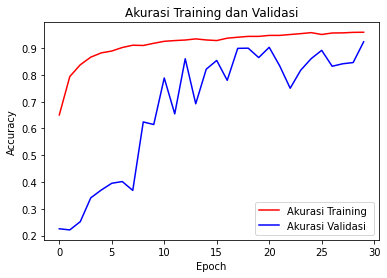

<Figure size 432x288 with 0 Axes>

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'r', label='Akurasi Training ')                 
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')
plt.title('Akurasi Training dan Validasi')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.figure()                                                                      
plt.show()

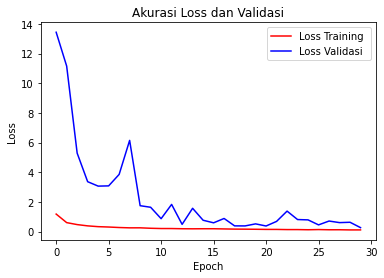

<Figure size 432x288 with 0 Axes>

In [25]:
epochs = range(len(loss))
 
plt.plot(epochs, loss, 'r', label='Loss Training ')                 
plt.plot(epochs, val_loss, 'b', label='Loss Validasi')
plt.title('Akurasi Loss dan Validasi')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.figure()                                                                      
plt.show()

# Prediksi gambar dengan model

Saving person_0001.jpg to person_0001.jpg
person_0001.jpg
ORANG


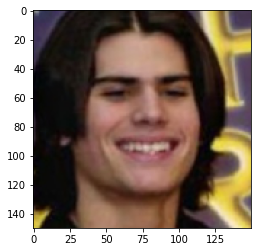

In [39]:
from google.colab import files
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys() :

  # prediksi image
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=256)

  print(fn)
  
  if classes[0][0] == 1 :
    print("PESAWAT")
  elif classes[0][1] == 1 :
    print("MOBIL")
  elif classes[0][2] == 1 :
    print("KUCING")
  elif classes[0][3] == 1 :
    print("aNJING")
  elif classes[0][4] == 1 :
    print("BUNGA")
  elif classes[0][5] == 1 :
    print("BUAH")
  elif classes[0][6] == 1 :
    print("MOTOR")
  elif classes[0][7] == 1 :
    print("GUNUNG")
  elif classes[0][8] == 1 :
    print("ORANG")
  elif classes[0][9] == 1 :
    print("LAUT")
  elif classes[0][10] == 1 :
    print("JALANAN")
  else:
    print("Gambar tidak ditemukan")

# Konversi model kedalam TF Lite agar bisa di embedding kedalam aplikasi Android atai iOS

In [40]:
# convert
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp0d13xiqc/assets


In [41]:
# membuat file dengan nama model.tflite
with tf.io.gfile.GFile('model.tflite', 'wb') as f :
  f.write(tflite_model)